# ETHZ: 227-0966-00L
# Quantitative Big Imaging
# April 30, 2020

## Bimodal experiments

#### Anders Kaestner

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import skimage.io as io
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Literature / Useful References

### Books
#### General:
- John C. Russ, "The Image Processing Handbook",(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
 
#### Fusion specific:
- Mitchell, H.B., ["Data Fusion: Concepts and Ideas"](https://www.doi.org/10.1007/978-3-642-27222-6), Springer Verlag, 2012.
- Mitchel, H.B., ["Image Fusion - Theories, Techniques and Applications"](https://www.doi.org/10.1007/978-3-642-11216-4), Springer Verlag, 2010.
- T. Stathaki, ["Image fusion"](https://doi.org/10.1016/B978-0-12-372529-5.X0001-7), Academic Press, 2008
- Goshtasby, A. Ardeshir, ["Image Registration Principles, Tools and Methods"](10.1007/978-1-4471-2458-0), Springer Verlag, 2012


- *Xiao, G., Bavirisetti, D.P., Liu, G., Zhang, X., ["Image Fusion"](https://www.doi.org/10.1007/978-981-15-4867-3), Springer Verlag, to be published July, 2020*
    

# Previously on QBI ...

- Image Enhancment 
 - Highlighting the contrast of interest in images
 - Minimizing Noise
- Understanding image histograms
- Automatic Methods
- Component Labeling
- Single Shape Analysis
- Complicated Shapes
- Dynamic Experiments
- Image registration
- Statistics
- Plotting

# Outline

- Motivation (Why and How?)
- Scientific Goals
- Image fusion
- Bivariate segmentation
- Managing data tables

# Some imaging experiments and their challenges

<table>
<col width="400px" />
<tr><th>Hydrology in soil and geology</th><th>Cultural heritage</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/soil.png" style="height:200px" />
</center>        
    
- Segmentation accuracy
- Estimate water content

</td>
<td>
<center>
<img src="../common/figures/buddha_neutron.png" style="height:200px" />
</center>
    
- Segmentation accuracy
- Material classification
        
</td>  
</tr>
<tr><th>Building materials</th><th>Materials science</th></tr>
<tr>
<td>
<center>    
<img src="../common/figures/CapillaryRise.png" style="height:200px" />
</center>        
    
- Estimate water content
- Dimensional changes

</td>
<td>
<center>    
<img src="../common/figures/weld.png" style="height:200px" />
</center>
    
- Penetration power
- Ambiguous readings
        
</td>  
</tr>
</table>


# Reasons to select an imaging modality?
Reasons to select or reject a specific imaging method
<table>
    <cols width="600px">
<tr>
<th>
    <center>
    <img src="../common/figures/noun_advantage.svg" style="height:100px">
            </center>
</th>    
<th>
         <center><img src="../common/figures/noun_Disadvantage.svg" style="height:100px"></center>
</th></tr>
<tr><td>
    
- Good transmission
- Good contrast
- Relevant features visible
- Materials can be identified
    
</td><td>
    
- Low transmission
- Low contrast
- Not all features visible
- Ambiguous response
    
</td></tr>
</table>

    
Until now, we only collected image features from a single modality.

# The aim of multimodal imaging
### Purpose of multi-modality
Match the advantages of each method against the disadvantages of the other methods to obtain more information than using each method individually.

1. Extend range of operation.
2. Extend spatial and temporal coverage.
3. Reduce uncertainty.
4. Increase reliability.
5. Robust system performance.

<img src="../common/figures/multispectral_goggles.png" style="height:200px" />

# The players of an imaging experiment

<img src="../common/figures/imaging_balls.png" style="height:500px" />

# Some considered modalities -  Neutrons and X-rays

<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/camera_neutrons.png" style="height:200px" />
</center>        
<center>
<img src="../common/figures/periodicN.png" style="height:400px" />
</center>     
</td>
<td>
<center>
<img src="../common/figures/camera_xrays.png" style="height:200px" />
</center>
    <center>
<img src="../common/figures/periodicX.png" style="height:400px" />
</center>
</td>
</tr>
</table>

# Some considered modalities for medical imaging
<img src="../common/figures/MedicalFusion.jpg"/>

[Du et al. 2015](https://doi.org/10.1016/j.neucom.2015.07.160)

# Some considered modalities - Grating interferometry

<table>
<cols width="400px" />
    <tr><th>Transmission</th><th>Differential phase</th><th>Dark field</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/nGI_TI.png" style="height:200px" />
</center>        
</td>
<td>
<center>
<img src="../common/figures/nGI_DPC.png" style="height:200px" />
</center>
    
</td>  
<td>
<center>
<img src="../common/figures/nGI_DFI.png" style="height:200px" />
</center>
</td>
</tr>
</table>

- Data comparable on pixel level
- Non-linear relation between the variables.
- Improved estimation schemes using iterative process
- Physical interpretation/motivation to fuse?


# Some considered modalities - Spectroscopic imaging
<img src="../common/figures/ES_Fe.png" style="height:400px" />

- Material analysis
- Selector calibration

S. Peetermans

# Other modalities and dimensionality
#### The information can also be provided as few localized points 
- Single spots
- Surface information
- Single radiographs vs CT data

#### to provide

- Temperature
- Flowrate
- Pressure


# Image fusion

# What is data fusion?
#### Definition
The theory, techniques and tools which are used for 
- combining sensor data, or data derived from sensory data, 
- into a common representational format.
	
#### Aim
To improve the quality of the information, so that it is, in some sense, better than would be possible if the data sources were used individually.


[Mitchell 2012](https://www.doi.org/10.1007/978-3-642-27222-6)

    
# Fusion approaches - no golden recipe
### Fusion strategies

- __Multivariate fusion:__ All data are combined using the same concept.
- __Augmented fusion:__ Modalities have different functions in the fusion process.
- __Artifact reduction by fusion:__ The second modality can be used to fill in the blanks.
- __Combination:__ A single fusion method may not give the final result - combination 

### Select strategy
The fusion strategy determined by:

- Sample composition 
- Experiment objectives 
- Condition of the data


# Levels of fusion

<table>
    <tr><th>Input</th><th>Output</th><th>Description</th></tr>
    <tr><td>Data</td><td>Data</td><td>Input data is smoothed/filtered/segmented</td></tr>
    <tr><td>Data</td><td>Feature</td><td>The pixels are reduced to features using multiple sources.</td></tr>
    <tr><td>Feature</td><td>Feature</td><td>Input features are reduced in number, <br /> or new features are generated by fusing input features.</td></tr>
    <tr><td>Feature</td><td>Decision</td><td>Input features are fused together to give output decision.</td></tr>
    <tr><td>Decision</td><td>Decision</td><td>Multiple input decisions are fused together <br/>to give a final output decision. e.g. Random forest</td></tr>
</table>

# Image fusion workflow
<img src="../common/figures/imagefusion_process.svg" style="height:800px" />

[Mitchel, 2010](https://www.doi.org/10.1007/978-3-642-11216-4), 
[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Catastrophic fusion
### Definition
The combination perform worse than the individual modalities.


Catastrofic fusion can be caused by:
- Selection of the wrong variables.
- Too complex combination.
- Sensor information canceling each other.

<img src="../common/figures/bad_soup.png" style="height:300px" />

# Image registration
### The process
A series of affine transformations to bring images on the same grid.

<img src="../common/figures/registration.svg" style="height:600px" />


# Registration considerations
Registration is an optimization problem with many local minima.

### Manual or guided registration
- Perform the full transformation manually
- Identify land marks, points, lines, planes
- Provide a coarse preregistration

### Automatic registration 
- Iterative process 
- Metrics
- Multi-modality loose common landmarks 

[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Qualitative fusion: Registration and covisualization
Use e.g. VG Studio or 3DSlicer to 

- Register data sets
- Interactive guided segmentation of the separate data sets.


<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/swordN.png" style="height:300px" />
</center>            
</td>
<td>
<center>
<img src="../common/figures/swordX.png" style="height:300px" />
</center>
</td>
</tr>
</table>


mannes2015_NXCultHer


# Let's load some test data

In [31]:
# Get images from volume, works only locally. Data too large for repos.
N=400
imgAFull = io.imread('/data/P20151041/04_evaluation/shell_N_final_transform.tiff')
imgBFull = io.imread('/data/P20151041/04_evaluation/shell_X.tiff')
imgA=imgAFull[N]
imgB=imgBFull[N]
np.save('../common/data/shellN.npy',imgA)
np.save('../common/data/shellX.npy',imgB)

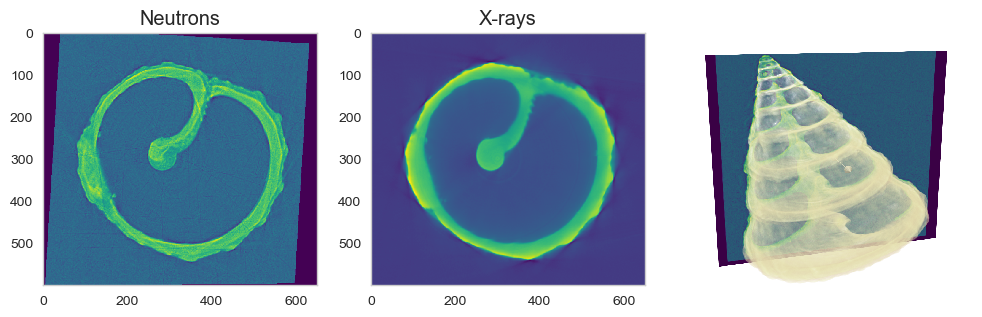

In [52]:
imgA=np.load('../common/data/shellN.npy')
imgB=np.load('../common/data/shellX.npy')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.imshow(imgA,cmap='viridis'), ax1.set_title('Neutrons')
ax2.imshow(imgB,cmap='viridis'), ax2.set_title('X-rays');
ax3.imshow(plt.imread('../common/figures/snailshellNeutron.png')); ax3.axis('off');

# Visualization techniques - Chess board


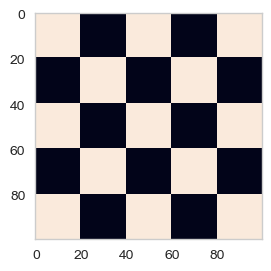

In [59]:
def checkerBoard(imgA,imgB,tiles=10) :
    if imgA.shape != imgB.shape :
        raise Exception('Image have different sizes')
    
    dims     = imgA.shape
    tileSize = (dims[0]//tiles,dims[1]//tiles)
    
    mix = np.zeros(dims)
    
    for r in np.arange(0,tiles) :
        for c in np.arange(0,tiles) : 
            if (c+r) % 2 : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgB[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]
            else : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgA[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]

    return mix
plt.figure(figsize=(3,3))
plt.imshow(checkerBoard(np.ones((100,100)),np.zeros((100,100)),tiles=5));

## Try checker board with images

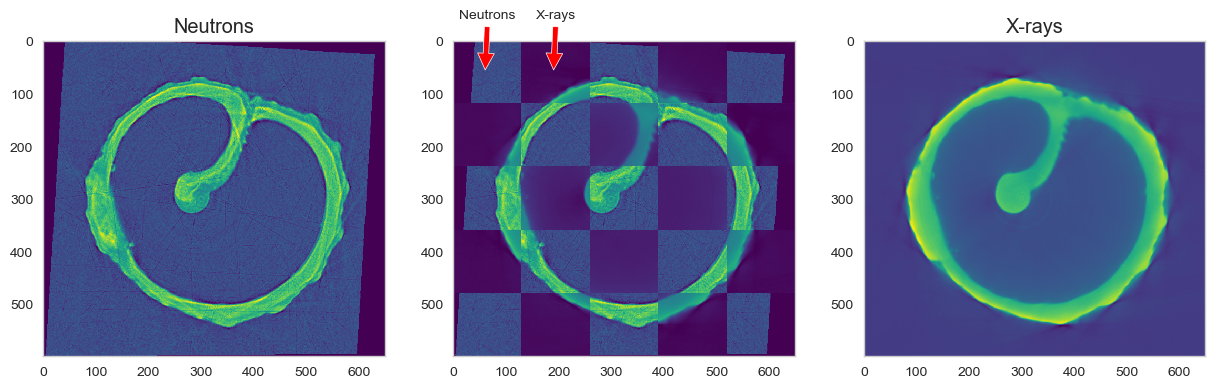

In [36]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.imshow(imgA,cmap='viridis',vmin=10000,vmax=60000), ax1.set_title('Neutrons')
ax2.imshow(checkerBoard(imgA,imgB,tiles=5),cmap='viridis',vmin=10000,vmax=60000); 
ax2.annotate('Neutrons',
            xy=(60, 60), xycoords='data',
            xytext=(0.1, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax2.annotate('X-rays',
            xy=(190, 60), xycoords='data',
            xytext=(0.3, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax3.imshow(imgB,cmap='viridis'), ax3.set_title('X-rays');

# Visualization techniques - Color chanel mixing
With two or more modalities, we can visualize the mix using the RGB color channels:

$$
\begin{eqnarray}
R &=& modality_A\\
G &=& modality_B\\
B &=& \frac{modality_A+modality_B}{2}
\end{eqnarray}
$$
some intensity scaling may be needed for best result.

In [41]:
def channelMix(imgA,imgB, order=(0,1,2)) :
    imgAN=(imgA-imgA.min())/(imgA.max()-imgA.min())
    imgBN=(imgB-imgB.min())/(imgB.max()-imgB.min())
    
    rgb=np.zeros((imgA.shape[0],imgA.shape[1],3));
    rgb[:,:,order[0]]=imgAN
    rgb[:,:,order[1]]=imgBN
    rgb[:,:,order[2]]=0.5*(imgAN+imgBN)
    
    return rgb

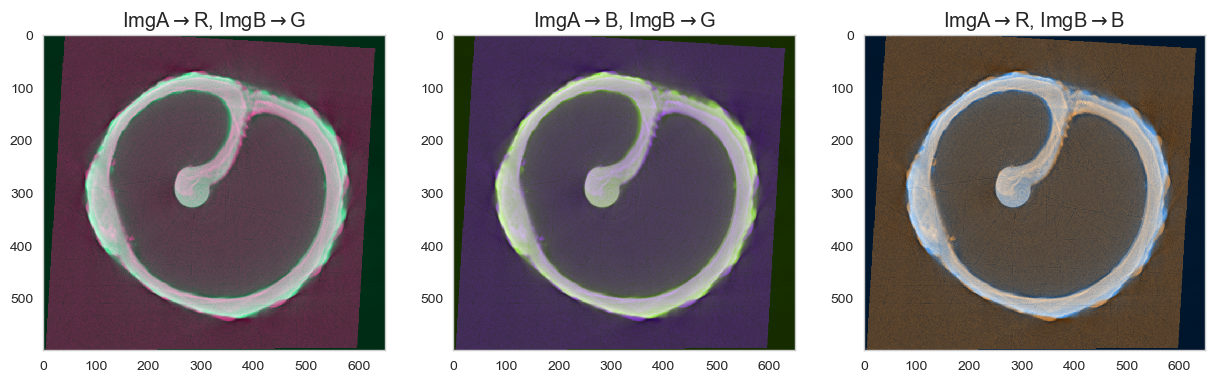

In [48]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
ax1.imshow(channelMix(imgA,imgB,order=(0,1,2))), ax1.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$G');
ax2.imshow(channelMix(imgA,imgB,order=(2,1,0))), ax2.set_title(r'ImgA$\rightarrow$B, ImgB$\rightarrow$G');
ax3.imshow(channelMix(imgA,imgB,order=(0,2,1))), ax3.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$B');

# Bimodal segmentation

# Bimodal Segmentation - Single modality histogram
<img src="../common/figures/overlapping_classesA.png" style="height:500px">


# Two modalities separate

<table>
<cols width="700px" />
<tr><th>Modality A</th><th>Modality B</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/overlapping_classesA.png" style="height:500px" />
</center>            
</td>
<td>
<center>
<img src="../common/figures/overlapping_classesB.png" style="height:500px" />
</center>
</td>
</tr>
</table>


# Bivariate histogram
<img src="../common/figures/bivariate_classes.png" style="height:600px" />

# Example: Roots in soil
<img src="../common/figures/root_slices.svg" style="height:500px"/>

# Bivariate histogram of roots
<img src="../common/figures/root_histogram.png" style="height:500px" />

# Classification methods
## Data
- Images from $M$ modalities $f_1, \ldots, f_M$
- Registered
- Artifact corrected

## Classes
The $N$ classes are described by: 
$$\begin{eqnarray}
\mathcal{H}_1 : p(\mathbf{\mu}_1,\Sigma_1)\nonumber\\
\mathcal{H}_2 : p(\mathbf{\mu}_2,\Sigma_2)\nonumber\\
\vdots\nonumber\\
\mathcal{H}_N : p(\mathbf{\mu}_N,\Sigma_N)\nonumber
\end{eqnarray}
$$


[Duda, Hart, and Stork, 2001](https://www.wiley.com/en-us/Pattern+Classification%2C+2nd+Edition-p-9781118586006)

# Gaussian mixture model

With Gaussian distribution we can describe the bivariate histogram using:
$$p(\theta)=\sum_{1}^{N} \phi\,\mathcal{N}(\mathbf{\mu}_i,\Sigma_i) $$

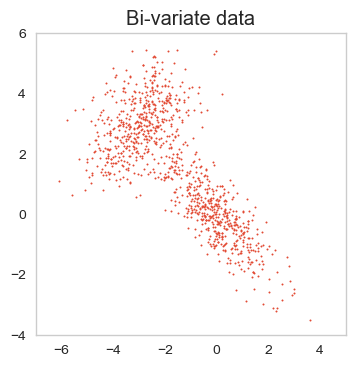

In [3]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C1 = np.array([[1, -0.5], [-0.5, 1]])
C2 = np.array([[1, 0.25], [0.25, 1]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C1), np.dot(np.random.randn(n_samples, 2),C2) + np.array([-3, 3])]

plt.figure(figsize=[4,4])
plt.scatter(X[:,0],X[:,1],0.8)
plt.xlim(-7., 5.),plt.ylim(-4., 6.)
plt.title('Bi-variate data');

In [8]:
def plot_results(X, Y_, means, covariances, title, ax, showShape=True, showCenter=False):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        ax.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        if showShape :
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)
            
        if showCenter :
            ax.plot(mean[0],mean[1],'ro')

    ax.set_xlim(-7., 5.)
    ax.set_ylim(-4., 6.)
    ax.set_title(title)


### Gaussian mixture model fitting

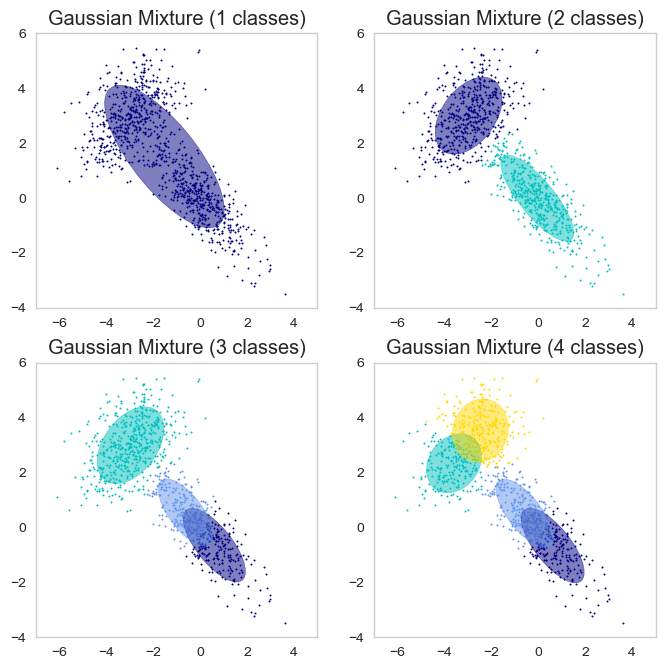

In [7]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
# Fit a Gaussian mixture with EM using five components
for i,ax in zip(np.arange(0,len(axes.ravel())),axes.ravel()) :
    gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full').fit(X)

    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             title='Gaussian Mixture ({} classes)'.format(i+1), ax=ax)


# Classification distances 
For a set of multivariate normal distributions $p_i=\mathcal{N}(\mu_i,\Sigma_i)$

We can find the nearest neighbor class using the following distances
#### Euclidean
Distance between two points
$$D_{E}=\sqrt{(x-\mu_1)^T \cdot (x-\mu_1)} $$

#### Mahanalubis
Distance from class $i$ to point $x$
$$D_M=\sqrt{\left(x-\mu_i\right)^T \Sigma_i \left(x-\mu_i\right)}$$

#### Bhattacharia
Distance between two classes 
$$D_B=\frac{1}{8}\left(\mu_1-\mu_2\right)^T \Sigma \left(\mu_1-\mu_2\right) + \frac{1}{2}\ln\left(\frac{|\Sigma|}{\sqrt{|\Sigma_1|\cdot|\Sigma_2|}}\right)\qquad \Sigma=\frac{\Sigma_1+\Sigma_2}{2}$$


Assign the point to the class with shortest distance.


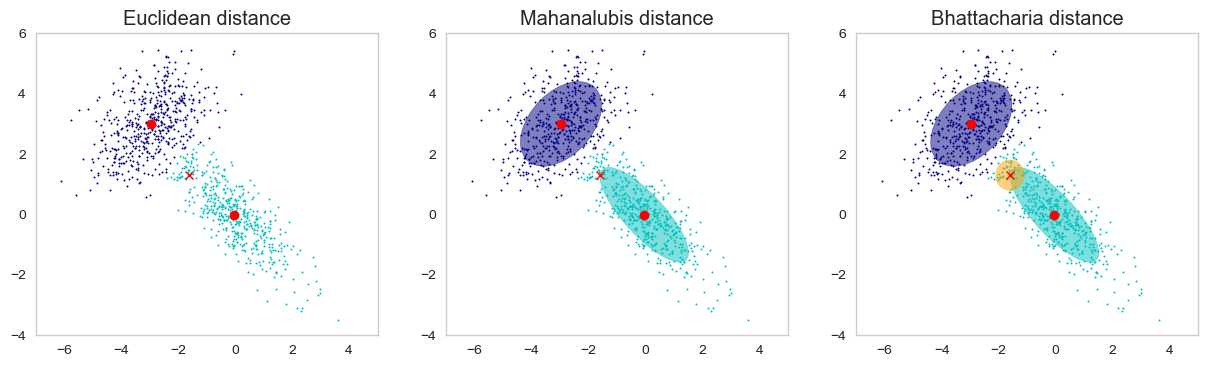

In [16]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
m=[-1.6,1.3]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Euclidean distance',ax1, showShape=False,showCenter=True)
ax1.plot(-1.6,1.3,'rx')
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Mahanalubis distance'.format(2),ax2, showCenter=True)
ax2.plot(-1.6,1.3,'rx')

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Bhattacharia distance'.format(2),ax3, showCenter=True)
v=1
ell = mpl.patches.Ellipse(m, v, v, 0, color='orange')
ell.set_clip_box(ax3.bbox)
ell.set_alpha(0.5)
ax3.add_artist(ell)
ax3.plot(m[0],m[1],'rx');

# Segmentation by Euclidean distance
<img src="../common/figures/roots_segmentation.svg" style="height:300px" />

kaestner2016_itmnrnx

# Bivariate estimation: Working with attenuation coefficients

### Beer-Lamberts law

$$ I=I_0\,e^{-\frac{\rho}{A}\,N_A\,\sigma\,x} $$
- $\rho$ Material denstity
- $A$ Atomic weight
- $\sigma$ microscopic cross section
     - Probability of interaction
     - modality dependent

- $x$ propagation length

### Equation system

$$
\begin{eqnarray}
\sum_{i=1}^{N}\,\Sigma_i\,x_i&=&q_N\nonumber\\
\sum_{i=1}^{N}\,\mu_i\,x_i&=&q_X
\end{eqnarray}
$$
- attn coeff known $\rightarrow$ estimate lengths.
- More pixels $\rightarrow$ more materials.



# Data frames - managing feature tables



# Our workflow
- Image analysis 
- Feature selection and analysis
- Presentation

<img src="../common/figures/StoreFeatures.svg" style="height:600px"/>

### How do we store the features while working?

# How do we store the features?
### Python offers different options
- Arrays per feature
- List of data structures/dictionaries

### Operations on the feature data 
- Counting
- Statistics
- Selections
- Transforms
- Visualization

## Problem
With custom storage we have to implement functions for each operation:
- Time consuming 
- Litle flexibility
- Error prone

# Introducing data frames
We have already seen data frames in action but never formally introduced them...

A data frame is
- A data container
- Organized into columns and rows
- Has similarities to a spread sheet table
- Takes any data in the columns

You can
- Apply filters for selection
- Sort the rows
- Perform artihmetics
- Compute statistics
- Read and store into files and databases

[Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
[Getting started with Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)


# Create a data frame
There are different ways to create a data frame:
- From a dict
- From a data file
- From numpy arrays

First we have import pandas:

In [61]:
import pandas as pd

# Create a data frame from a list of dicts
This is the very basic use case. We create the data frame as the features are produced.

In [76]:
dl = []
for i in np.arange(0,10) :
    dl.append({'position' : i, 'sine' : np.sin(i)})
    
df = pd.DataFrame(dl)

df.head()

,position,sine
0,0,0.000000
1,1,0.841471
2,2,0.909297
3,3,0.141120
4,4,-0.756802


# Read from a spreadsheet (csv)
Sometimes the features have been extracted elsewhere and stored in a file, e.g. CSV

In [74]:
pheno = pd.read_csv('../Exercises/10-Statistics_DataFrames/phenoTable.csv')
pheno.sample(5)

,BMD,MECHANICS_STIFFNESS,CORT_DTO__C_TH,CORT_DTO__C_TH_SD,CORT_MOM__J,CT_TH_RAD,CT_TH_RAD_STD,CANAL_VOLUME,CANAL_COUNT,CANAL_DENSITY,...,CANAL_THETA,CANAL_THETA_CV,CANAL_PCA1,CANAL_PCA1_CV,CANAL_PCA2,CANAL_PCA2_CV,CANAL_PCA3,CANAL_PCA3_CV,FEMALE,ID
567,0.0373,85.093498,0.195715,0.019470,0.185464,79.165339,6.691323,27868.004823,214.0,240.140172,...,57.499479,0.348652,271.137075,1.112301,71.691377,0.947315,34.178642,0.666136,1,1711
168,0.0325,48.569011,0.160826,0.022096,0.095804,78.149629,21.125324,21871.162324,52.0,102.880409,...,53.600950,0.502439,247.783926,1.314821,82.399950,1.249063,34.157710,1.109893,1,726
698,0.0357,61.253490,0.193510,0.015941,0.153276,83.361605,16.161817,28312.748883,184.0,227.151910,...,55.733813,0.376194,226.498078,0.987210,62.899383,1.221245,29.580866,0.802265,1,1992
146,0.0345,63.593738,0.174728,0.015782,0.150544,78.360876,14.468349,19525.657091,145.0,193.897161,...,47.300505,0.497468,294.088005,1.359107,67.394640,0.981649,28.628717,0.612990,1,696
113,0.0333,57.182795,0.189788,0.026900,0.127444,88.536313,17.930260,56669.597609,219.0,238.435195,...,52.808183,0.410839,216.928037,0.916973,67.364169,0.744948,30.526761,0.532350,1,650


Saving works similarly:

In [81]:
pheno.to_csv('pheno2.csv')

# Add a new column
When we start working on the data, we may need to add a column
<img src="../common/figures/new_column.svg" style="height:200px"/>

In [83]:
df['cosine']=np.cos(df['position'])
df['sum']=df['sine']+df['cosine']
df.head()

,position,sine,cosine,sum
0,0,0.000000,1.000000,1.000000
1,1,0.841471,0.540302,1.381773
2,2,0.909297,-0.416147,0.493151
3,3,0.141120,-0.989992,-0.848872
4,4,-0.756802,-0.653644,-1.410446


# Select some rows with content filtering

In [84]:
df2=df[0<df['sine']]
df2

,position,sine,cosine,sum
1,1,0.841471,0.540302,1.381773
2,2,0.909297,-0.416147,0.493151
3,3,0.141120,-0.989992,-0.848872
7,7,0.656987,0.753902,1.410889
8,8,0.989358,-0.145500,0.843858
9,9,0.412118,-0.911130,-0.499012


# Rename column titles
__Note__:Here is also a different way to create a data frame with dicts and lists.

In [110]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.head()

,A,B
0,1,4
1,2,5
2,3,6


In [111]:
df.rename(columns={"A": "hej", "B": "hopp"})

,hej,hopp
0,1,4
1,2,5
2,3,6


# Statistics with a data frame
You can easily compute statistics on a data frame:
- mean
- std
- min
- max
- median

In [86]:
df2.mean()

position    3.405877
sine        0.326874
cosine      0.726264
sum         0.952373
dtype: float64

In [105]:
df.describe()

,position,sine,cosine,sum
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,0.195521,0.042162,0.237683
std,3.02765,0.693076,0.765706,1.009325
min,0.00000,-0.958924,-0.989992,-1.410446
25%,2.25000,-0.209562,-0.594269,-0.631200
50%,4.50000,0.276619,0.069081,0.586953
75%,6.75000,0.795350,0.700502,0.960965
max,9.00000,0.989358,1.000000,1.410889


# Statistics of filtered data
Compute the standard deviation for all columns with the rows have 0<sum

In [88]:
df[0<df['sum']].std()

position    3.405877
sine        0.529797
cosine      0.594661
sum         0.371964
dtype: float64

# Visualizing the contents of a data frame
In addition to all other plotting options, Pandas supports some basic plotting functionality 

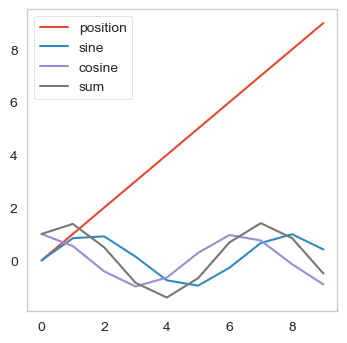

In [93]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
df.plot(ax=ax);

# Selective plotting

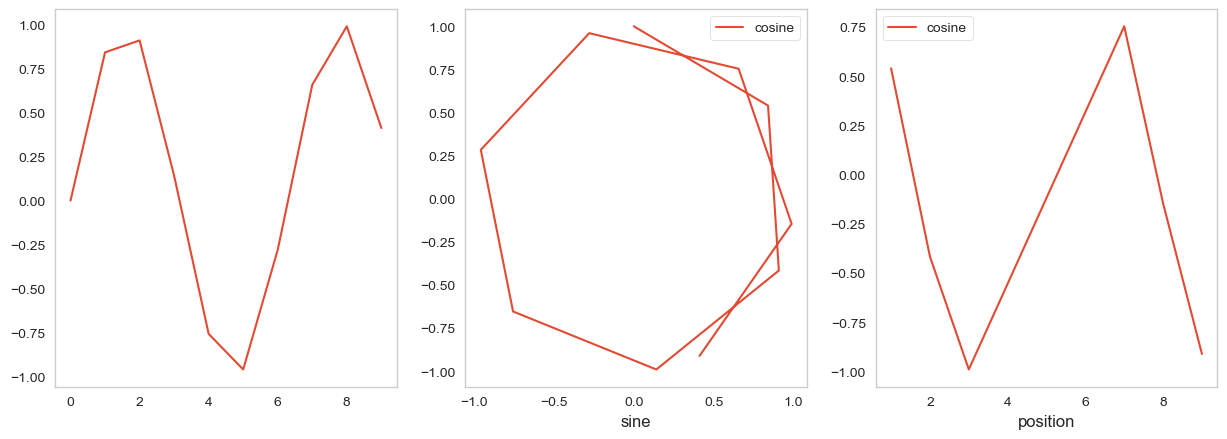

In [104]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
df['sine'].plot(ax=ax1);
df.plot(x='sine',y='cosine',ax=ax2);
df[0<df['sine']].plot(x='position',y='cosine',ax=ax3);

# Different plotting styles

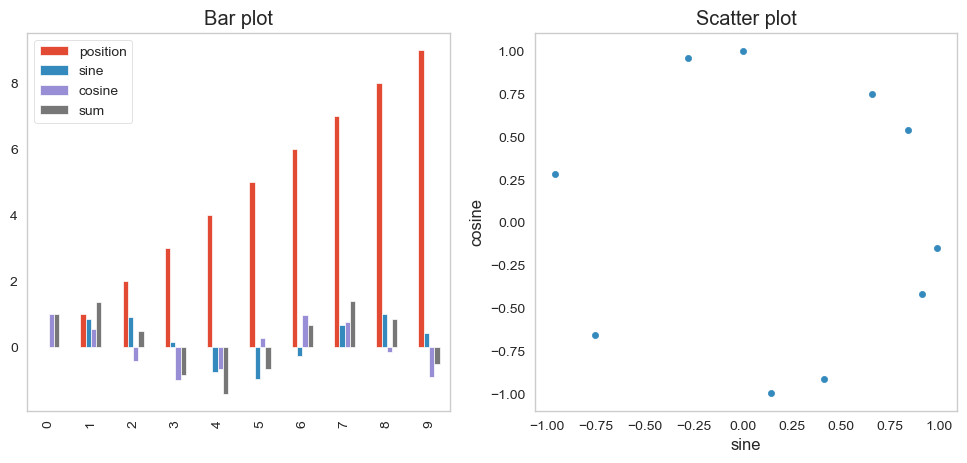

In [103]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
df.plot(kind='bar',ax=ax1); ax1.set_title('Bar plot');
df.plot(kind='scatter',x='sine',y='cosine',ax=ax2); ax2.set_title('Scatter plot');

Further plotting options can be found on [pandas visualization documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

# Set operations with data frames
In our work we may produce several data frames that needs to be merged:
- Image features
- Meta data
- Sensor logs
- etc.

[Merging frames topic in Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

# Concatenating frames
### Add more rows with the same categories

In [120]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']})

frames = [df1, df2]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [117]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


frames = [df1, df2]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


# Merging data frames
### Add columns with new categories, at least one column in common.

In [127]:
df1 = pd.DataFrame({'id' : [1,2,3,4],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'id' : [1,2,3,4],
                    'X': ['B4', 'B5', 'B6', 'B7'],
                    'Y': ['C4', 'C5', 'C6', 'C7'],
                    'Z': ['D4', 'D5', 'D6', 'D7']},
                    index=[1,2,3,4])

df=pd.merge(df1,df2)
df.head()

,id,A,B,C,D,X,Y,Z
0,1,A0,B0,C0,D0,B4,C4,D4
1,2,A1,B1,C1,D1,B5,C5,D5
2,3,A2,B2,C2,D2,B6,C6,D6
3,4,A3,B3,C3,D3,B7,C7,D7


# Create new data frame from selected columns

In [ ]:
new = old[['A','C','D']]

# When are pandas data frames useful?
- Pandas is useful for *large* data - It must fit in the local memory.
- Really big data need other options, e.g. [dask data frames](https://docs.dask.org/en/latest/dataframe.html)

### How about big quantitative imaging?
<img src="../common/figures/size_abstraction.svg" style="height:300px">

#### Images can be stored in the data frame, but think twice!

# Summary

### Multiple modalities
- Add more information to improve the conclusions
- Add component in the analysis and visualization
- Data fusion can be done on different levels of abstraction.

### Data frames
- A tool for handling the mess of data storage and analysis
- A local database that allows filtering, arithmetics, plotting, etc.